# Data Workflow 

## Widget n°5 

#### Required libraires

In [1]:
!pip install pandas matplotlib ipywidgets


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import pandas as pd
import random
import plotly.express as px
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, fixed

### Data Collection

Consulter le fichier `data/source.md` pour savoir lequelles sont disponibles

#### Load data

In [3]:
path_input = input("Enter your input data path.")
if not path_input:
    path_input = "../data/donnees_immobilieres.csv"

In [4]:
data = pd.read_csv(path_input)

In [5]:
print(data.head())

                    commune  departement   latitude  longitude    type_bien  \
0           Rosny-sous-Bois           93  48.873971   2.484808  Appartement   
1  Paris 20e Arrondissement           75  48.857495   2.406804  Appartement   
2   Paris 5e Arrondissement           75  48.851482   2.347632  Appartement   
3                    Lisses           91  48.600538   2.422382  Appartement   
4                   Jouarre           77  48.914167   3.146526       Maison   

   surface_m2  prix_total   prix_m2  annee date_transaction     etat  \
0        45.0    204900.0   4553.33   2022       2022-05-19  Inconnu   
1        27.0    218000.0   8074.07   2021       2021-04-15  Inconnu   
2        40.0    860000.0  21500.00   2021       2021-08-12  Inconnu   
3        83.0    212382.0   2558.82   2023       2023-08-04  Inconnu   
4        75.0    167200.0   2229.33   2022       2022-09-21  Inconnu   

   cout_renovation_m2_estime  
0                          0  
1                          0  

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   commune                    50000 non-null  object 
 1   departement                50000 non-null  int64  
 2   latitude                   50000 non-null  float64
 3   longitude                  50000 non-null  float64
 4   type_bien                  50000 non-null  object 
 5   surface_m2                 50000 non-null  float64
 6   prix_total                 50000 non-null  float64
 7   prix_m2                    50000 non-null  float64
 8   annee                      50000 non-null  int64  
 9   date_transaction           50000 non-null  object 
 10  etat                       50000 non-null  object 
 11  cout_renovation_m2_estime  50000 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 4.6+ MB


In [7]:
data["commune"] = data["commune"].astype('string')
# data["type_bien"] = data["type_bien"].astype('category')
data["date_transaction"] = pd.to_datetime(data["date_transaction"], format="%Y-%m-%d")
# data["etat"] = data["etat"].astype('category')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   commune                    50000 non-null  string        
 1   departement                50000 non-null  int64         
 2   latitude                   50000 non-null  float64       
 3   longitude                  50000 non-null  float64       
 4   type_bien                  50000 non-null  object        
 5   surface_m2                 50000 non-null  float64       
 6   prix_total                 50000 non-null  float64       
 7   prix_m2                    50000 non-null  float64       
 8   annee                      50000 non-null  int64         
 9   date_transaction           50000 non-null  datetime64[ns]
 10  etat                       50000 non-null  object        
 11  cout_renovation_m2_estime  50000 non-null  int64         
dtypes: d

### Data Processing

### Data Manipulation

### Data Visualization

#### Prix d’achat estimé vs potentiel de revente (Scatter Plot)

- Type : Nuage de points interactif
- Objectif : Montrer les biens sous-évalués par rapport à la tendance du marché.
- Paramètres : Type de bien, budget max, surface.
- Outils : plotly.express
- Besoins couverts : Identifier les biens à fort potentiel de plus-value.

- fonctions : checker les donnees en entree

In [18]:
# --- fonction pour demander un nombre (entier, à virgule)
def checkNumber(message, min_value=0):
    try:
        valeur = input(message)
        valeur = float(valeur)
        if valeur < min_value:
            raise ValueError(f"❌ Merci d'entrer un nombre >= {min_value}.")
        return valeur
    except ValueError:
        print("❌ Merci d'entrer un nombre valide.")

# --- fonction pour demander un texte non vide
def checkText(message):
    valeur = input(message).strip()
    if valeur == "":
        raise ValueError("❌ Merci d'écrire quelque chose.")
    else:
        return valeur


- entrer les donnees a filtrer

In [20]:
# --- demander les paramètres à l'utilisateur

type_bien_filtre = checkText("Type de bien ? (ex : Appartement, Maison) : ")
print(type_bien_filtre)
budget_max = checkNumber("Budget maximum (€) : ")
print(budget_max)
surface_min = checkNumber("Surface minimum (m²) : ")
print(surface_min)
surface_max = checkNumber("Surface maximum (m²) : ")
print(surface_max)

# --- vérifier cohérence  entre surfaces
if surface_max < surface_min:
    raise ValueError("❌ Surface max doit être > surface min.")


print(f"Type de bien : {type_bien_filtre}")
print(f"Budget max   : {budget_max} €")
print(f"Surface min  : {surface_min} m²")
print(f"Surface max  : {surface_max} m²")


Maison
800000.0
20.0
89.0
Type de bien : Maison
Budget max   : 800000.0 €
Surface min  : 20.0 m²
Surface max  : 89.0 m²


- filtrer les données

In [21]:
df_filtered = data[
    (data["type_bien"] == type_bien_filtre) &
    (data["prix_total"] <= budget_max) &
    (data["surface_m2"] >= surface_min) &
    (data["surface_m2"] <= surface_max)
]

- graphique de visualisation (scatter plot)

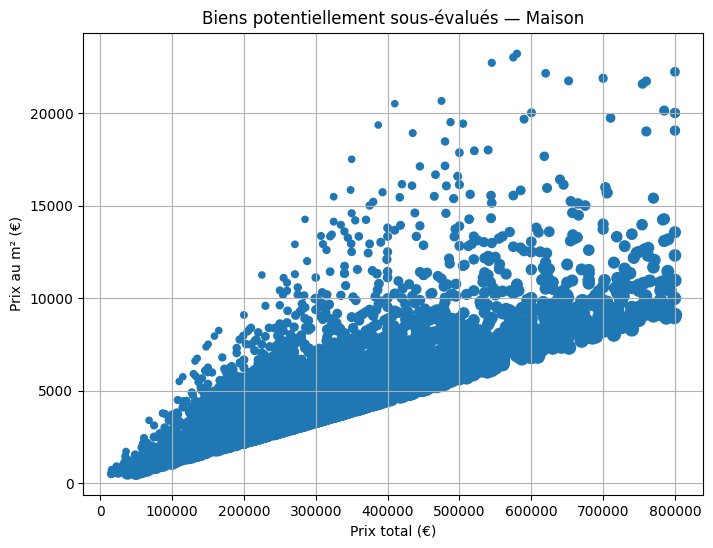

In [22]:
# x = prix total
# y = prix au m2
# taille des points = surface (idée : voir les gros biens)
plt.figure(figsize=(8, 6))

# scatter coloré par type de bien
plt.scatter(
    df_filtered["prix_total"],
    df_filtered["prix_m2"],
    s=df_filtered["surface_m2"] 
)

# titres et labels
plt.title(f"Biens potentiellement sous-évalués — {type_bien_filtre}")
plt.xlabel("Prix total (€)")
plt.ylabel("Prix au m² (€)")

# petite grille pour lire plus facilement
plt.grid(True)

# affichage
plt.show()

#### Système de scoring : Top 10 opportunités

- Type : Tableau trié interactif
- Objectif : Montrer les 10 meilleures opportunités selon un score calculé.
- Paramètres : Pondération (marge, prix, surface, zone, aide dispo).
- Outils : pandas, ipywidgets, matplotlib
- Besoins couverts : Prioriser les investissements.

Le score total est une combinaison pondérée des sous-scores suivants :
- score_marge : basé sur le prix au mètre carré (plus bas est mieux)
- score_prix : basé sur le prix total (plus bas est mieux)
- score_surface : basé sur la surface (plus grand est mieux)
- score_zone : basé sur la zone géographique (Paris = 1, autres = 0.5)
- score_aide : basé sur les aides disponibles (0 ou 1)

- définition des paramètres de scoring (base sur le dataset)

In [32]:
df_filtered_for_scoring = df_filtered.copy()

In [44]:
# Score marge (prix/m2 bas = opportunité)
df_filtered_for_scoring["score_marge"] = 1 - (df_filtered_for_scoring["prix_m2"] / df_filtered_for_scoring["prix_m2"].max())

# Score prix (prix total bas = mieux)
df_filtered_for_scoring["score_prix"] = 1 - (df_filtered_for_scoring["prix_total"] / df_filtered_for_scoring["prix_total"].max())

# Score surface (plus grand = mieux)
df_filtered_for_scoring["score_surface"] = df_filtered_for_scoring["surface_m2"] / df_filtered_for_scoring["surface_m2"].max()

# Score zone :
# 1 pour Paris (75)
# 0.5 pour les autres départements

# mapping score zone IDF
zone_score_map = {
    75: 0.4,  # Paris - prestige mais faible rentabilité
    92: 0.6,  # Hauts-de-Seine
    94: 0.65, # Val-de-Marne
    93: 0.70, # Seine-Saint-Denis 
    78: 0.75, # Yvelines
    91: 0.75, # Essonne
    95: 0.75, # Val-d'Oise
    77: 0.85, # Seine-et-Marne
}

df_filtered_for_scoring["score_zone"] = df_filtered_for_scoring["departement"].map(zone_score_map).fillna(0.5)


# Score aide logement : valeur binaire (0 ou 1) aléatoire pour harmoniser les données
df_filtered_for_scoring["score_aide"] = [random.choice([0, 1]) for _ in range(len(df_filtered_for_scoring))]

print(df_filtered_for_scoring.head())


                  commune  departement   latitude  longitude type_bien  \
4                 Jouarre           77  48.914167   3.146526    Maison   
8               Chalifert           77  48.897902   2.770573    Maison   
9              Pierrelaye           95  49.022830   2.156835    Maison   
10                Gonesse           95  48.995646   2.427495    Maison   
13  Le Perray-en-Yvelines           78  48.684206   1.849366    Maison   

    surface_m2  prix_total  prix_m2  annee date_transaction     etat  \
4         75.0    167200.0  2229.33   2022       2022-09-21  Inconnu   
8         80.0    130000.0  1625.00   2023       2023-07-03  Inconnu   
9         45.0    245500.0  5455.56   2021       2021-06-29  Inconnu   
10        69.0    150000.0  2173.91   2024       2024-06-27  Inconnu   
13        79.0    363110.0  4596.33   2022       2022-02-18  Inconnu   

    cout_renovation_m2_estime  score_marge  score_prix  score_surface  \
4                           0     0.903908    0.7

In [45]:
def calculate_scoring(df, w_marge: float, w_prix: float, w_surface: float, w_zone: float, w_aide: float):
    df["score_total"] = (
        w_marge   * df["score_marge"] +
        w_prix    * df["score_prix"] +
        w_surface * df["score_surface"] +
        w_zone    * df["score_zone"] +
        w_aide    * df["score_aide"]
    )
    return df.sort_values(by="score_total", ascending=False).head(10)


In [49]:
def generate_top10(w_marge, w_prix, w_surface, w_zone, w_aide):
    
    # calculer le scoring avec les poids donnés
    top10 = calculate_scoring(
        df_filtered_for_scoring, w_marge, w_prix, w_surface, w_zone, w_aide
    )

    # Affichage tableau sur widget dans notebook
    display(top10[["commune", "type_bien", "surface_m2", "prix_total", "prix_m2", "score_total"]])

    # Visualisation par graphique
    plt.figure(figsize=(8,4))
    plt.bar(top10["commune"], top10["score_total"])
    plt.xticks(rotation=45)
    plt.title("Top 10 des opportunités")
    plt.show()

In [ ]:
interact(
    # fonction appelé par le widget
    generate_top10,
    
    # paramètres du widget
    w_marge   = FloatSlider(value=1, min=df_filtered_for_scoring["score_marge"].min(), max=df_filtered_for_scoring["score_marge"].max(), step=0.1, description="Marge"),
    w_prix    = FloatSlider(value=1, min=df_filtered_for_scoring["score_prix"].min(), max=df_filtered_for_scoring["score_prix"].max(), step=0.1, description="Prix"),
    w_surface = FloatSlider(value=1, min=df_filtered_for_scoring["score_surface"].min(), max=df_filtered_for_scoring["score_surface"].max(), step=0.1, description="Surface"),
    w_zone    = FloatSlider(value=1, min=df_filtered_for_scoring["score_zone"].min(), max=df_filtered_for_scoring["score_zone"].max(), step=0.1, description="Zone"),
    w_aide    = IntSlider(min=0, max=1, step=1, value=10, description="Aides")
);


interactive(children=(FloatSlider(value=0.9777297413793103, description='Marge', max=0.9777297413793103), Floa…